In [73]:
options(repr.plot.width=20, repr.plot.height=15)

In [77]:
library(ggmap)
library(maps)
library(mapdata)
library(maptools)
library(dplyr)
library(rgdal)
library(geosphere)
library(plotrix)
library(ggrepel)
library(sf)

Linking to GEOS 3.9.1, GDAL 3.4.0, PROJ 8.1.1; sf_use_s2() is TRUE



Data from here: https://hub.arcgis.com/datasets/17e8587747434f95b16aede1ed134e9b/explore?location=38.161950%2C-76.427600%2C8.39

In [82]:
map_new <- st_read("~/Documents/Perk_distribution/Chesapeake_Bay_Shoreline_High_Resolution/", "Chesapeake_Bay_Shoreline_High_Resolution")


Reading layer `Chesapeake_Bay_Shoreline_High_Resolution' from data source 
  `/Users/sarah/Documents/Perk_distribution/Chesapeake_Bay_Shoreline_High_Resolution' 
  using driver `ESRI Shapefile'
Simple feature collection with 1 feature and 3 fields
Geometry type: POLYGON
Dimension:     XY
Bounding box:  xmin: -77.46416 ymin: 36.71463 xmax: -75.39099 ymax: 39.60928
Geodetic CRS:  WGS 84


In [101]:
Perkinsus=read.csv("~/Documents/Perk_distribution/Perkinsus_MD_Data.csv")

In [102]:
head(Perkinsus)

,Year,Region,Site,Lat,Long,Prevalence,MeanIntensity,MonitoringStation,X,X.1,⋯,X.10,X.11,X.12,X.13,X.14,X.15,X.16,X.17,X.18,X.19
,<int>,<chr>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<lgl>,<lgl>,⋯,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
1,1990,Tangier Sound,Back Cove,38.01781,-75.58789,100,2.7,EE3.2 S. Tangier Sound,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,1991,Tangier Sound,Back Cove,38.01781,-75.58789,100,4.2,EE3.2 S. Tangier Sound,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,1992,Tangier Sound,Back Cove,38.01781,-75.58789,97,3.3,EE3.2 S. Tangier Sound,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,1993,Tangier Sound,Back Cove,38.01781,-75.58789,36,1.0,EE3.2 S. Tangier Sound,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,1994,Tangier Sound,Back Cove,38.01781,-75.58789,80,2.2,EE3.2 S. Tangier Sound,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,1995,Tangier Sound,Back Cove,38.01781,-75.58789,83,3.0,EE3.2 S. Tangier Sound,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [103]:
Perkinsus$Lat <- as.numeric(Perkinsus$Lat)
Perkinsus$Long <- as.numeric(Perkinsus$Long)

In [86]:
options(sf_max.plot=1)

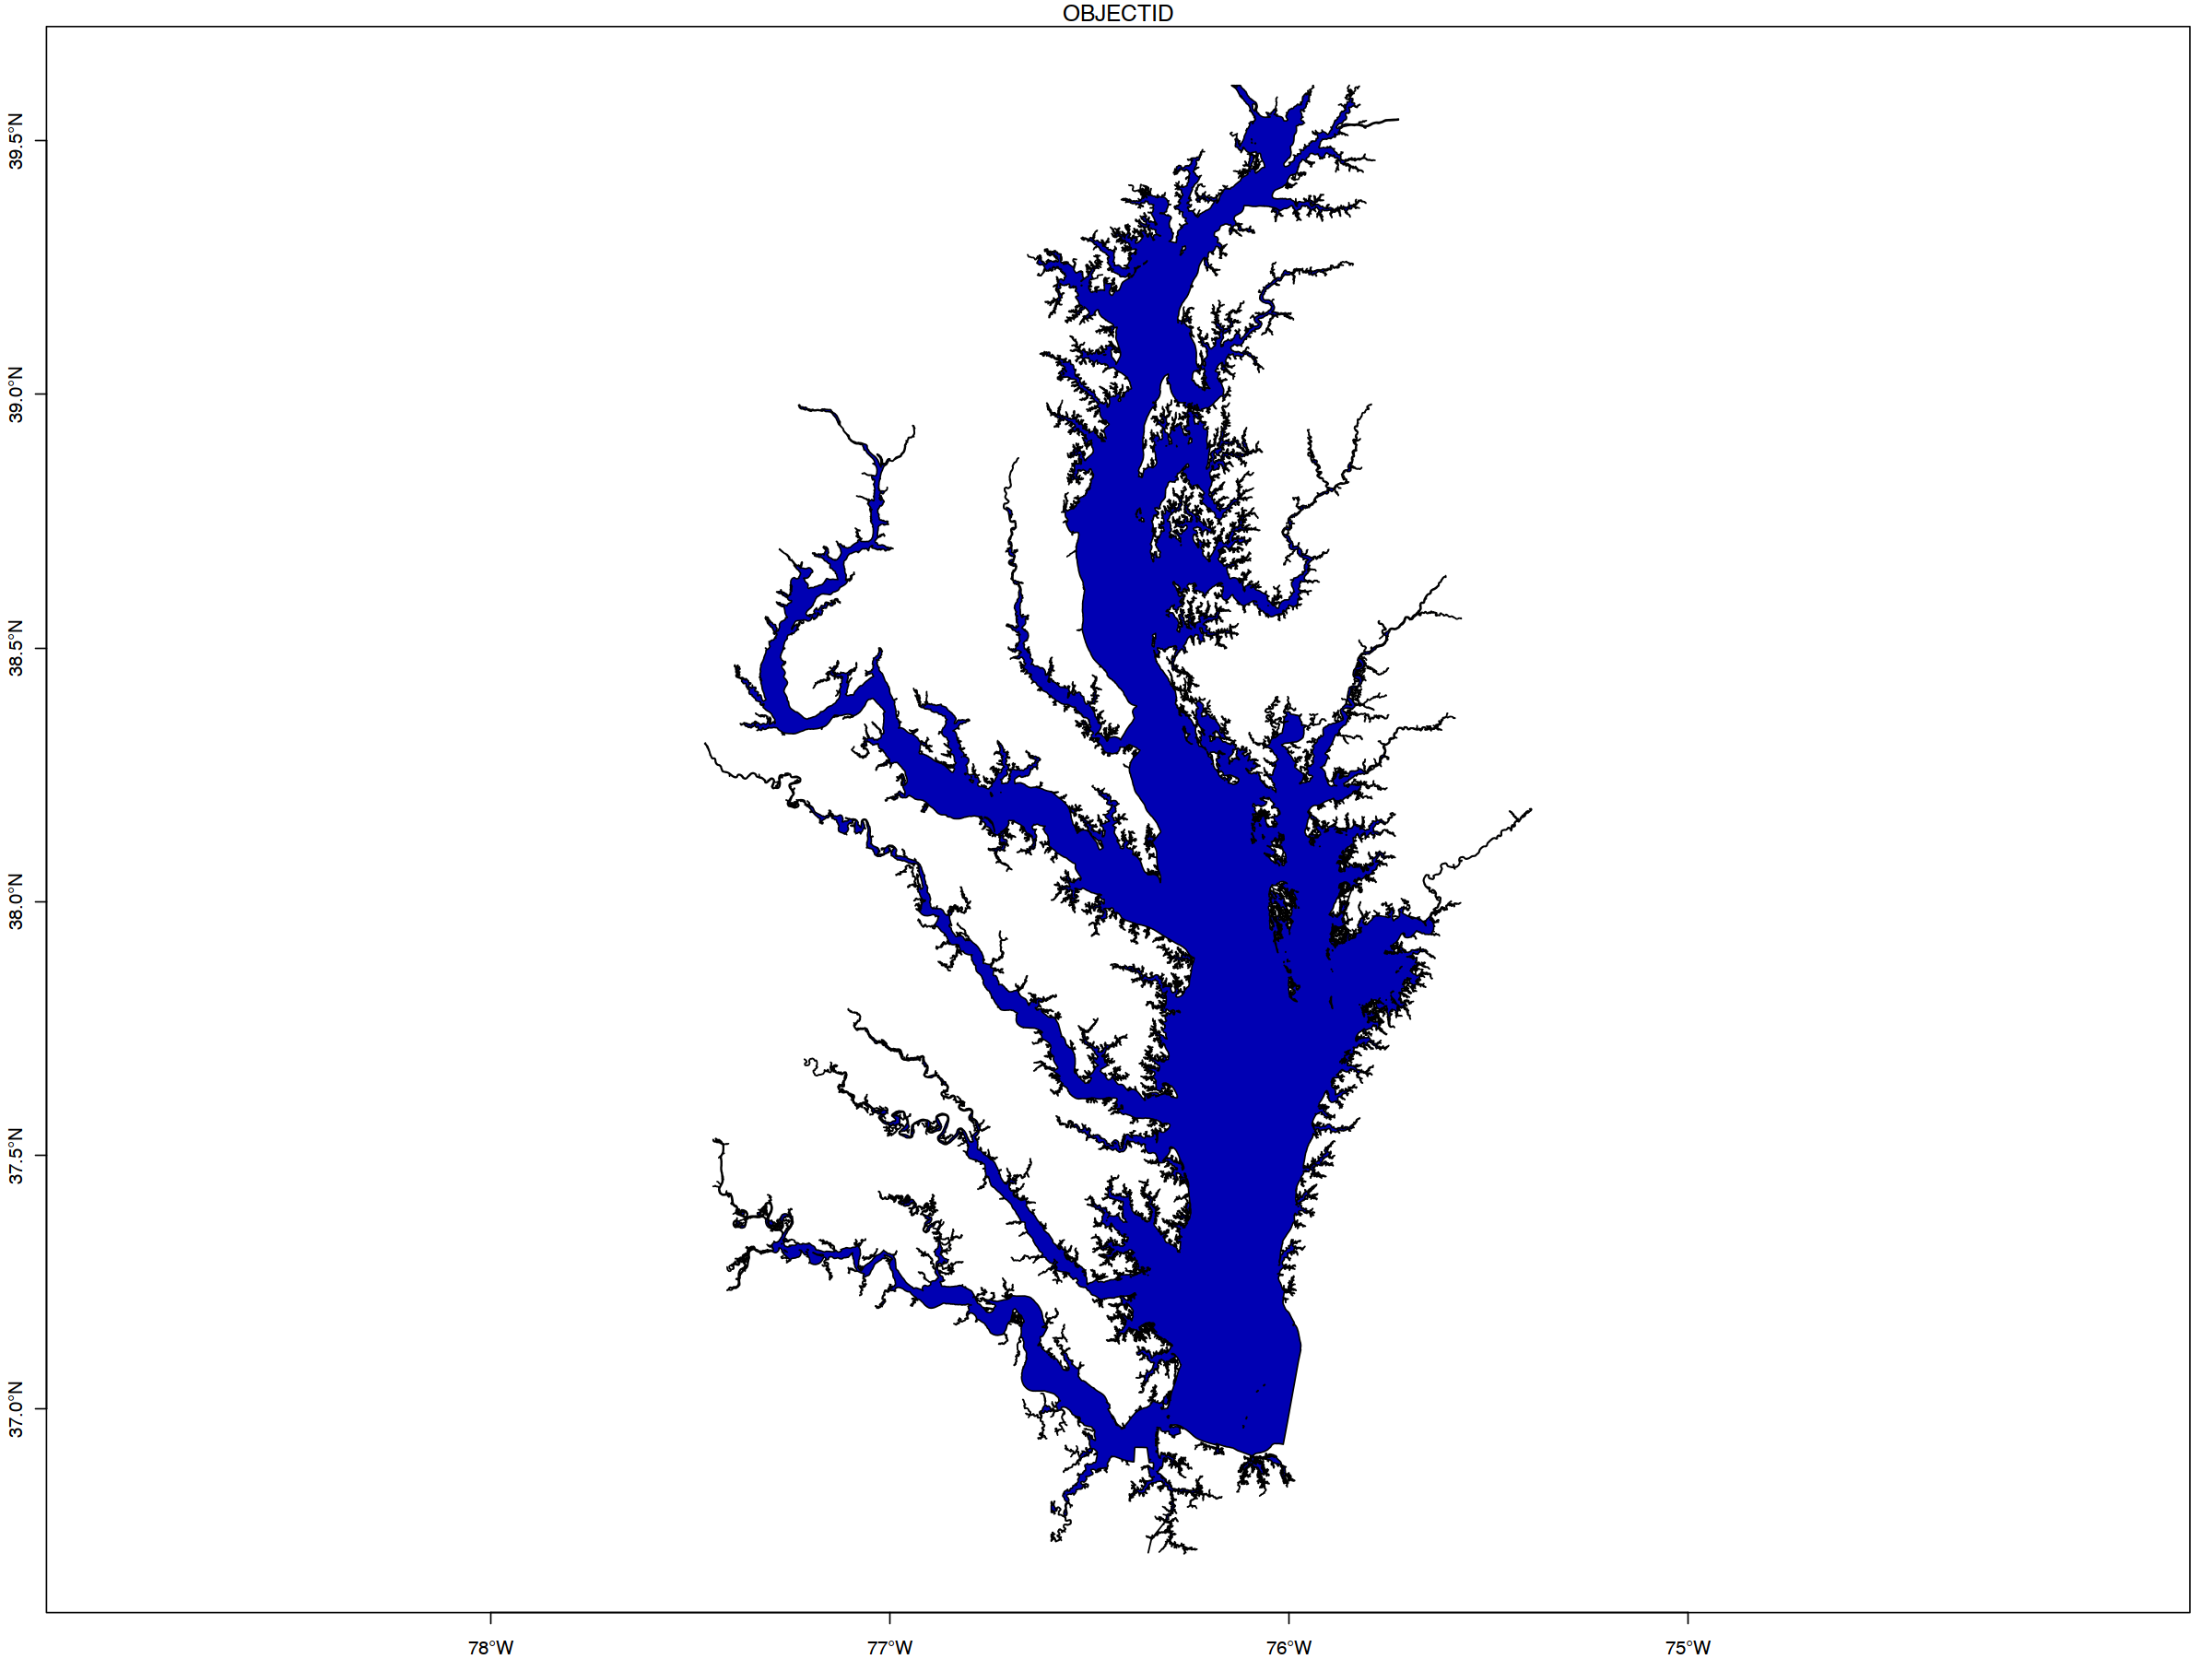

In [89]:
plot(map_new, axes=TRUE)

Warning message:
“Removed 203 rows containing missing values (geom_point).”


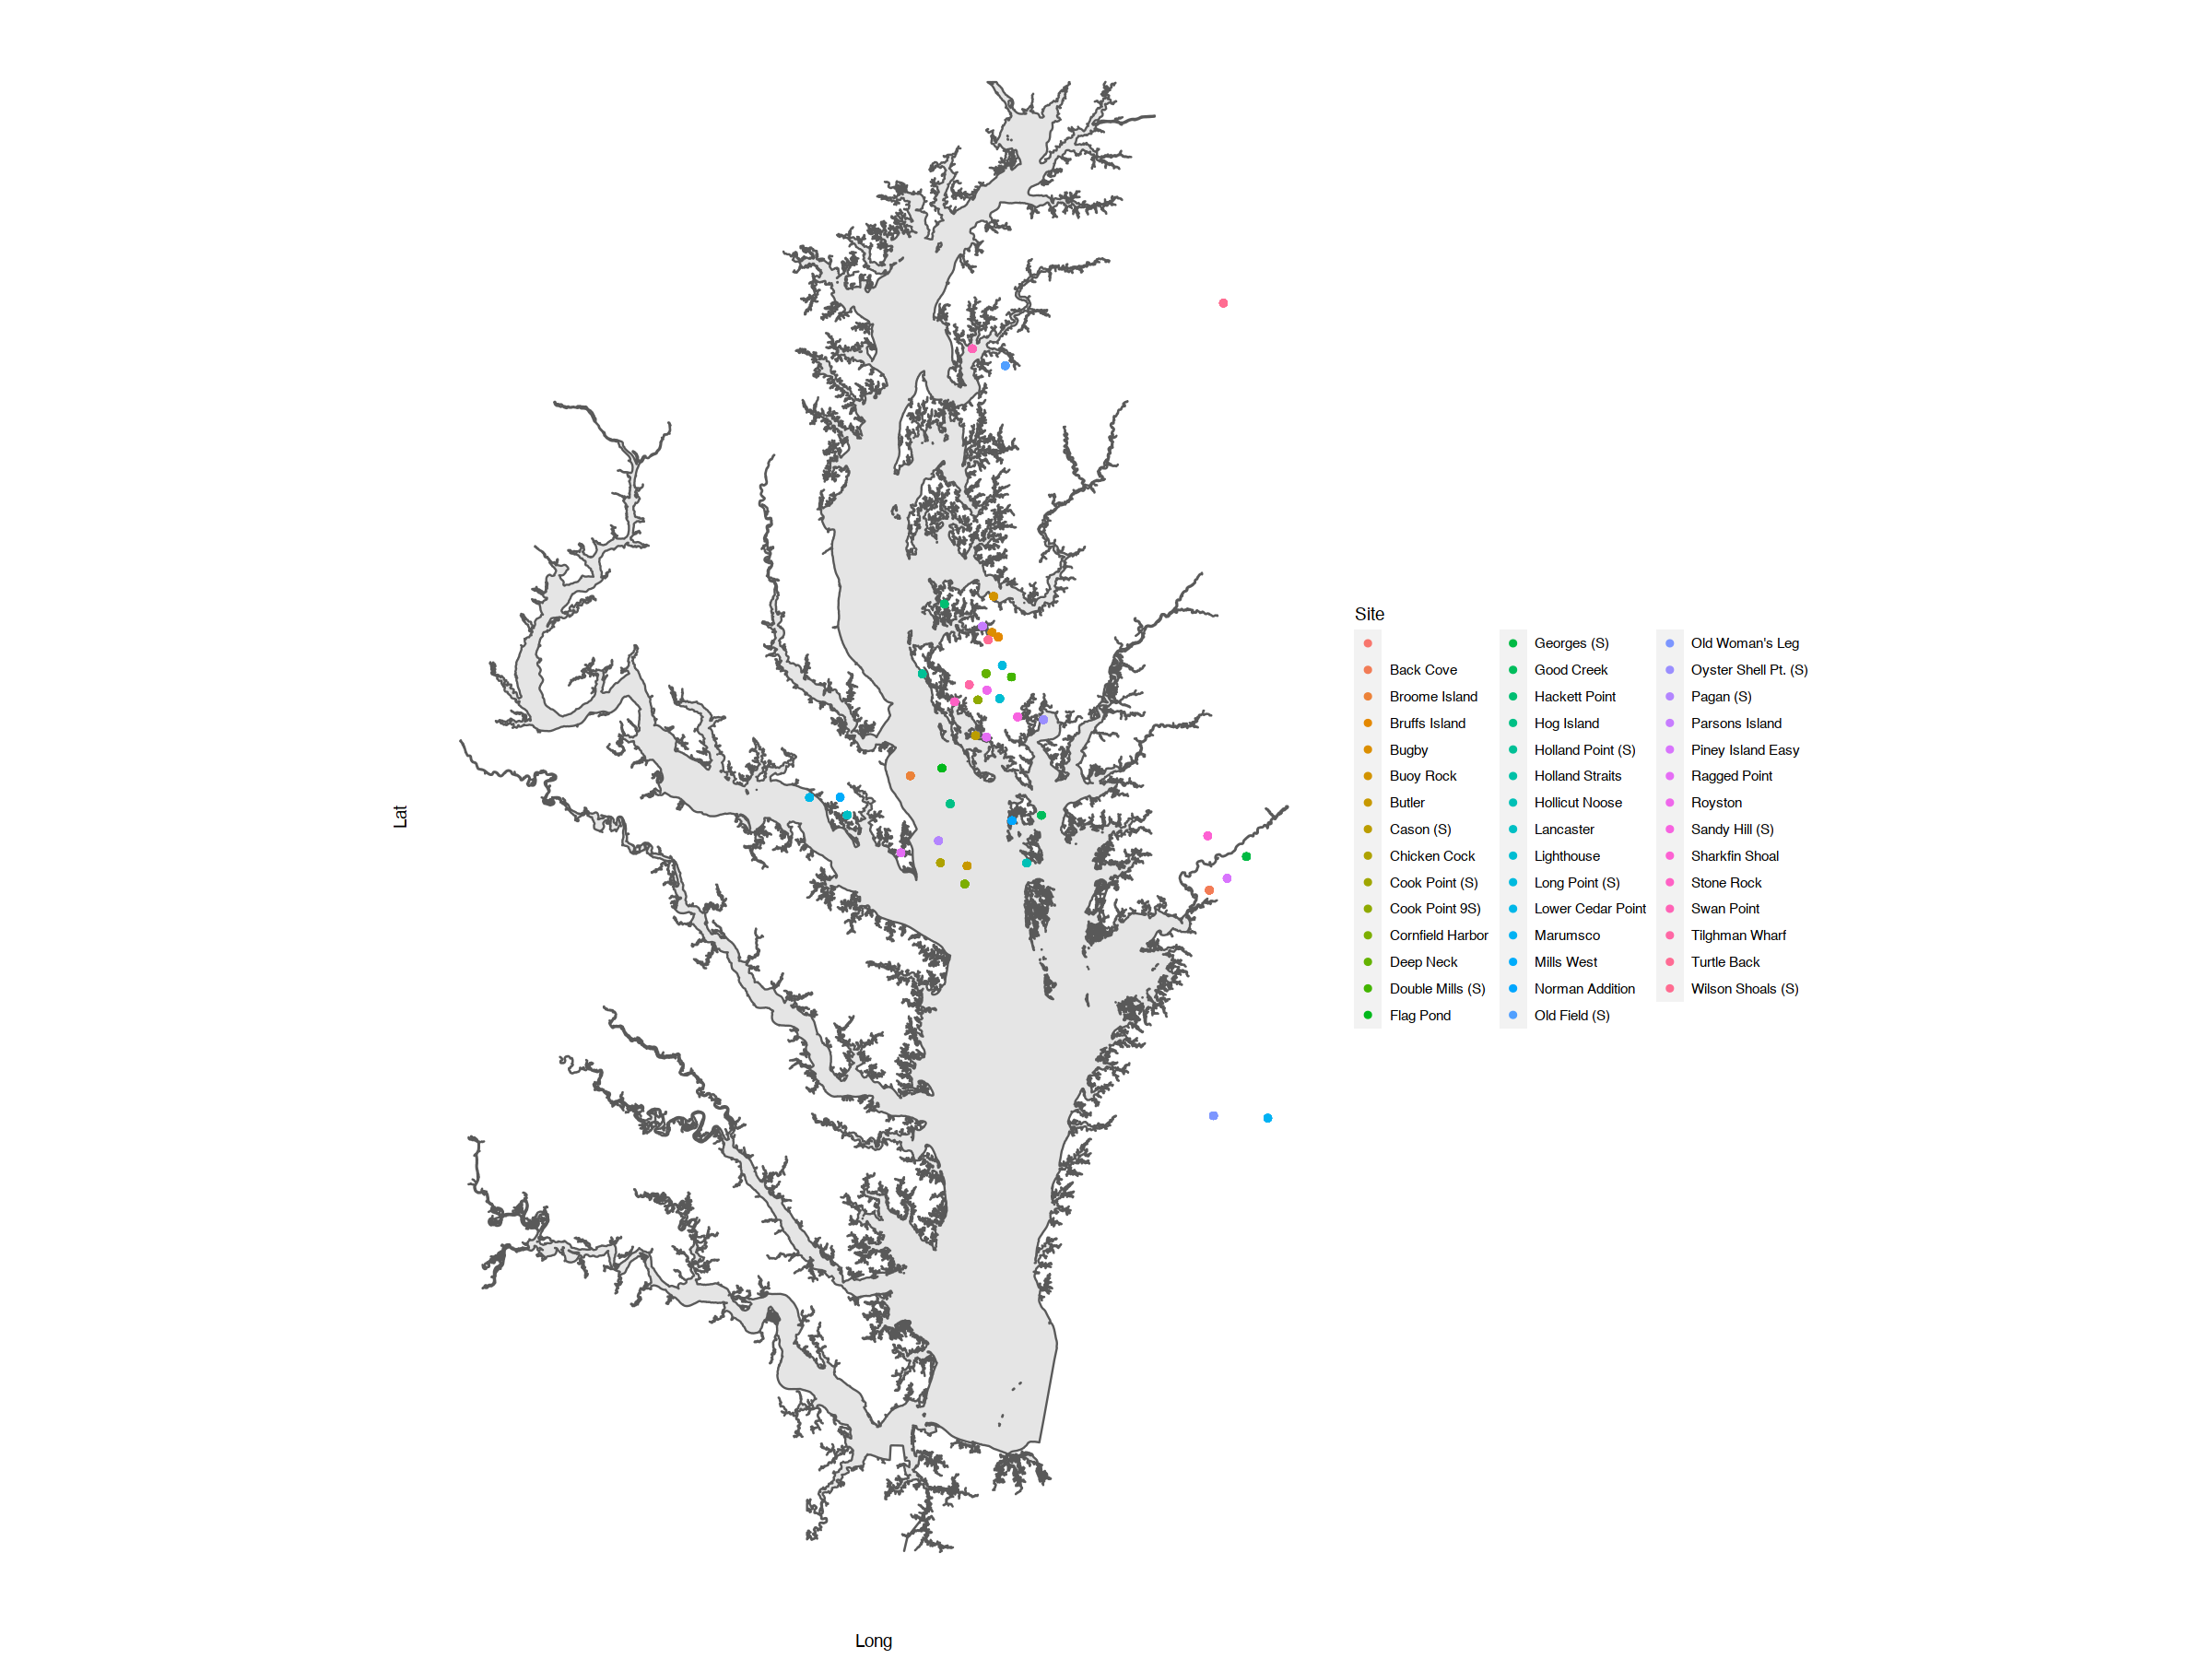

In [104]:
ggplot() + geom_sf(data = map_new)+
  theme(panel.grid.minor = element_blank(), 
  panel.background = element_blank(), 
  axis.text=element_blank(), 
  axis.ticks=element_blank())+
 geom_point(data = envdat,aes(Long, Lat, color = Site ))

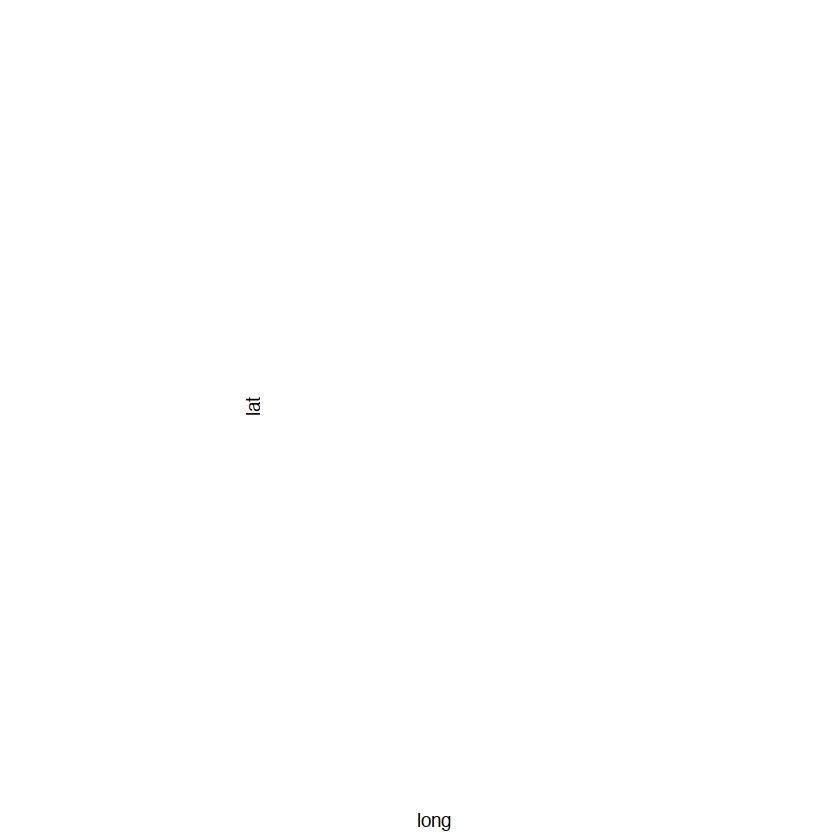

In [41]:
site_area

In [ ]:


#read site name locations
centroids <- read.csv("site_centroids.csv", header=TRUE)
areas <- read.csv("site_area_header_nonsurveyed.csv", header=T)
map_new <- readOGR("PHL_adm")
#map_gg <- fortify(map_new)
#map <- ggplot() +
#  geom_path(data = map_gg, 
#            aes(x = long, y = lat, group = group),
#            color = 'gray', fill = 'green', size = .2)
#
#map

#myLocation <- c(lon=124.728036, lat=10.767203)
#myMap <- get_map(location=myLocation, source="google", maptype="satellite", crop=FALSE, color="bw", zoom=11) 
#map_new <- ggmap(myMap)
#map_points <- map_new + geom_point(aes(x = lon, y = lat), data = labels,
#                 alpha = 1, color="darkred", size = 2) +
#  geom_label_repel(aes(label = site),fill= NA, data=labels, nudge_x= 0.3,
#    segment.size = 0.2, hjust=1.5,
#    direction="y", color = 'white', label.size=NA, family = "Helvetica") +
#    ylab("Latitude") +
#    xlab("Longitude") +
#  theme(axis.title.y=element_text(size=16, family = "Helvetica"),
#        axis.title.x=element_text(size=16, family = "Helvetica"),
#        axis.text.x = element_text(size=12, hjust = 0, family = "Helvetica"), 
#        axis.text.y = element_text(size=12, hjust = 0, family = "Helvetica")) 
   
   
area_latlon <- inner_join(centroids, areas, by="site")     
#map_points


xlims = c(124.64, 124.80) # site areas

ylims = c(10.63, 10.87)

#plot(map_new, xlim=c(124.78, 124.8), ylim=c(10.62,10.88))
#text(labels$lon, labels$lat, labels=labels$site, col="black", cex=.7, offset=1.8, pos=4)

#from Allison's code
site_area <- ggplot(data = map_new, aes(x = long, y = lat, , group = group)) +
  coord_fixed(xlim = xlims, ylim = ylims, 1.3) +  
  geom_polygon(colour = "grey", fill = "grey") +
  theme(panel.grid.minor = element_blank(), 
  panel.background = element_blank(), 
  axis.text=element_blank(), 
  axis.ticks=element_blank())
  
site_area + 
			geom_point(data=area_latlon, aes(x=lon, y=lat), size=as.factor(msq))
